# <center> Points inside / outside a ball</center>

## Imports

In [286]:
%matplotlib inline

import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rng = numpy.random # random number generator

## Settings

In [287]:
N = 1000            # number of samples
nTrainSteps = 10000 # number of training steps
alpha = 0.01        # learning rate
nTestSamples = 1000 # number of testing samples

## Generate training sample

In [288]:
def isInBall (p): # returns 1 (0) if point is (not) in ball (radius chosen so #inside ~ #outside)
  return int (p[0] * p[0] + p[1] * p[1] + p[2] * p[2] < 1)

X = (2.0 * rng.sample ((N, 3)) - 1) # random points [-1,1]x[-1,1]x[-1,1]
Y = [isInBall(x) for x in X]        # 1/0 for points inside/outside ball

## Plot training sample

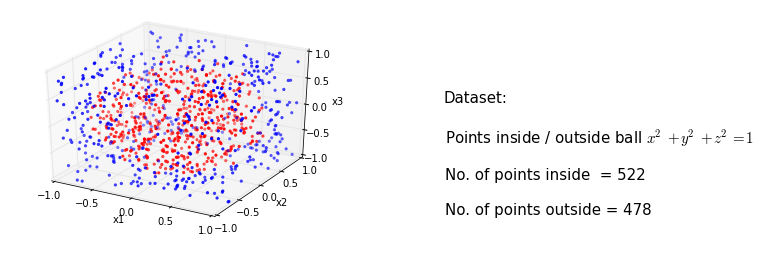

In [289]:
inside, outside = [], [] # separate points inside and outside ball

for i in range(N):
    if Y[i]: inside.append(X[i])
    else: outside.append(X[i])

fig = plt.figure()
plot = fig.add_subplot(111, projection='3d')
        
# axis settings        

plot.set_xlabel('x1')
plot.set_ylabel('x2')
plot.set_zlabel('x3')

plot.set_xlim([-1, 1])
plot.set_ylim([-1, 1])
plot.set_zlim([-1, 1])

# plot samples

plot.scatter(*zip(*inside), marker = '.', color = 'r')
plot.scatter(*zip(*outside), marker = '.', color = 'b')

plot.text(4.0, -2, 0.0,'Dataset:\n\n'
                       'Points inside / outside ball $x^2 + y^2 + z^2 = 1$\n\n'
                       'No. of points inside  = %d\n\n'
                       'No. of points outside = %d\n\n'
                       % (len(inside), len(outside)), fontsize = 15)


plt.show()

## Learn net

In [290]:
### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

w1 = theano.shared(rng.rand(4,7), name = 'w1') # hidden layer's weights (including bias)
w2 = theano.shared(rng.rand(8), name = 'w2')   # output layer's weights (including bias)

### EXPRESSION GRAPH ###

def layer (x, w):             # inputs, weights
    b = numpy.array([1])      # bias term
    xb = T.concatenate([x,b]) # input x with bias added
    return nnet.sigmoid(T.dot(w.T, xb))

hiddenLayer = layer (x, w1)                 # hidden layer
outputLayer = T.sum(layer(hiddenLayer, w2)) # output layer
cost = (outputLayer - y)**2                 # cost function
prediction = outputLayer > 0.5              # prediction threshold

def gradient (c, w):                 # cost function, weights
    return w - alpha * T.grad (c, w) # update weights

### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = [(w1, gradient(cost, w1)),
                                   (w2, gradient(cost, w2))])

predict = theano.function(inputs=[x], outputs=prediction)

### TRAIN ###

for i in range (nTrainSteps):
    for j in range(N):
        c = train(X[j], Y[j])    

## Test net

In [291]:
score = 0    

for i in range(nTestSamples):
    p = (2.0 * rng.sample (3) - 1)
    if predict(p) == isInBall(p): score += 1
        
print 'Score =', 1.0 * score / nTestSamples

Score = 0.975
